In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [3]:
pd.crosstab(df['quality'], df['high_quality'])

high_quality,0.0,1.0
quality,,
3,30,0
4,216,0
5,2138,0
6,2836,0
7,0,1079
8,0,193
9,0,5


In [4]:
df['high_quality'].describe()

count    6497.000000
mean        0.196552
std         0.397421
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: high_quality, dtype: float64

baseline accuracy is **20%** it should be more than **mean**

In [5]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.049447
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.151714
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.054444
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.161781
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.014767
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,-0.051226
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.275441
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,0.028149
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,0.033971


In [6]:
df.corr().loc[:, 'high_quality']

fixed_acidity          -0.049447
volatile_acidity       -0.151714
citric_acid             0.054444
residual_sugar         -0.063992
chlorides              -0.161781
free_sulfur_dioxide     0.014767
total_sulfur_dioxide   -0.051226
density                -0.275441
pH                      0.028149
sulphates               0.033971
alcohol                 0.390486
quality                 0.759360
is_red                 -0.087479
high_quality            1.000000
Name: high_quality, dtype: float64

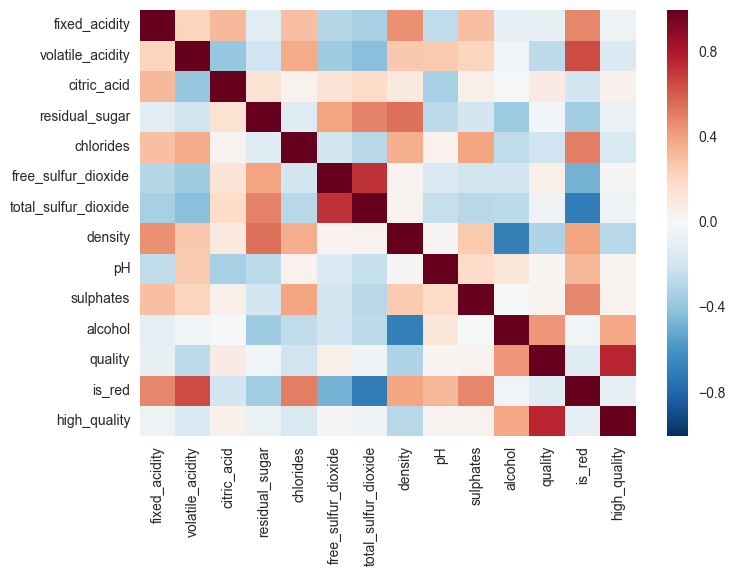

In [7]:
sns.heatmap(df.corr())

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X = df[['density', 'alcohol', 'volatile_acidity', 'chlorides']]
SS  = StandardScaler()
SS.fit_transform(X)

array([[ 1.03499282, -0.91546416,  2.18883292,  0.56995782],
       [ 0.70148631, -0.58006813,  3.28223494,  1.1979747 ],
       [ 0.76818761, -0.58006813,  2.55330026,  1.02669737],
       ..., 
       [-0.71925142, -0.91546416, -0.6054167 , -0.42915996],
       [-2.00325148,  1.9354021 , -0.30169391, -0.97153818],
       [-1.7631268 ,  1.09691202, -0.78765037, -1.02863062]])

In [10]:
X = df[['density', 'alcohol', 'volatile_acidity', 'chlorides']]
scale(X)

array([[ 1.03499282, -0.91546416,  2.18883292,  0.56995782],
       [ 0.70148631, -0.58006813,  3.28223494,  1.1979747 ],
       [ 0.76818761, -0.58006813,  2.55330026,  1.02669737],
       ..., 
       [-0.71925142, -0.91546416, -0.6054167 , -0.42915996],
       [-2.00325148,  1.9354021 , -0.30169391, -0.97153818],
       [-1.7631268 ,  1.09691202, -0.78765037, -1.02863062]])

scale(X) == StandardScaler.fit_transform(X)

In [11]:
y = df['high_quality'].reshape(-1, 1)
X = df[['density', 'alcohol', 'volatile_acidity', 'chlorides']]
X_scaled = scale(X)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn.fit(X, y)
knn.score(X, y)

/home/ali/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


0.87655841157457293

In [14]:
knn.fit(X_scaled, y)
knn.score(X_scaled, y)

/home/ali/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


0.88256118208403878

In [15]:
subset = df.sample(frac=0.2, replace=False)
X_sub = subset[['density', 'alcohol', 'volatile_acidity', 'chlorides']]
X_sub_scaled = scale(X_sub)
y = subset['high_quality'].reshape(-1, 1)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(X_sub, y)
knn.score(X_sub, y)

/home/ali/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


0.87220939183987678

In [18]:
knn.fit(X_sub_scaled, y)
knn.score(X_sub_scaled, y)

/home/ali/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


0.86605080831408776

In [19]:
from sklearn.cross_validation import cross_val_score

In [20]:

s = cross_val_score?

In [ ]:
s = cross_val_score

In [21]:
y = df['high_quality']
X = df[['density', 'alcohol', 'volatile_acidity', 'chlorides']]
knn = KNeighborsClassifier(n_neighbors=7)

In [22]:
s = cross_val_score(knn, X, y, cv=7)

In [23]:
my_scores = []
for n in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X, y, cv=7)
    print 'For %d neighbor, %s average accurancy across 7-fold cv' % (n, np.mean(scores))
    my_scores.append(np.mean(scores))

For 1 neighbor, 0.745554074941 average accurancy across 7-fold cv
For 2 neighbor, 0.784045797047 average accurancy across 7-fold cv
For 3 neighbor, 0.762026091598 average accurancy across 7-fold cv
For 4 neighbor, 0.787736731722 average accurancy across 7-fold cv
For 5 neighbor, 0.766952371041 average accurancy across 7-fold cv
For 6 neighbor, 0.780810713894 average accurancy across 7-fold cv
For 7 neighbor, 0.775264524679 average accurancy across 7-fold cv
For 8 neighbor, 0.789737301856 average accurancy across 7-fold cv
For 9 neighbor, 0.783728291096 average accurancy across 7-fold cv
For 10 neighbor, 0.78958518445 average accurancy across 7-fold cv
